In [1]:
! python3 --version

Python 3.8.12


In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os
import re
import functools



pd.__version__, np.__version__

('1.4.1', '1.21.2')

In [3]:
project_dir = '/Users/gurdeep/Documents/tb2/DSMP/G32-Butterfly-Data'
module_dir = project_dir+'/modules'

dataset_filepath = '/Users/gurdeep/Documents/tb2/DSMP/luftdaten_pm_bristol.csv'

os.chdir(project_dir)
current_working_dir = os.getcwd()
print("Current working dir:", current_working_dir)
print("All paths correct:", os.path.isdir(project_dir) == os.path.isdir(module_dir) == os.path.isfile(dataset_filepath) == True)

Current working dir: /Users/gurdeep/Documents/tb2/DSMP/G32-Butterfly-Data
All paths correct: True


In [4]:
# importing preprocessing module
os.chdir(module_dir)
import Preprocessing
os.chdir(current_working_dir)

## Loading File

In [15]:
df = pd.read_csv(dataset_filepath, delimiter=";")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561829 entries, 0 to 561828
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Sensor ID    561829 non-null  int64  
 1   Date Time    561829 non-null  object 
 2   PM10         561829 non-null  float64
 3   PM2.5        478669 non-null  float64
 4   Lat Long     561829 non-null  object 
 5   Day of Week  561829 non-null  int64  
 6   Hour of Day  561829 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 30.0+ MB


,Sensor ID,Date Time,PM10,PM2.5,Lat Long,Day of Week,Hour of Day
0,69513,2022-02-28T01:00:00+00:00,15.61,5.18,"51.470943,-2.5794697",1,1
1,38362,2022-02-28T01:00:00+00:00,17.94,8.25,"51.475834,-2.591864",1,1
2,7675,2022-02-28T01:00:00+00:00,17.06,7.44,"51.464,-2.566",1,1
3,66966,2022-02-28T01:00:00+00:00,16.29,4.65,"51.468,-2.586",1,1
4,10491,2022-02-28T01:00:00+00:00,13.66,6.25,"51.464,-2.566",1,1


## Renaming columns

In [16]:
{col: '' for col in df.columns}

{'Sensor ID': '',
 'Date Time': '',
 'PM10': '',
 'PM2.5': '',
 'Lat Long': '',
 'Day of Week': '',
 'Hour of Day': ''}

In [17]:
mapper = {'Sensor ID': 'sensor_id',
 'Date Time': 'date_time',
 'PM10': 'pm10',
 'PM2.5': 'pm25',
 'Lat Long': 'lat_long',
 'Day of Week': 'day_of_week',
 'Hour of Day': 'hour_of_day'}

In [18]:
df.rename(columns=mapper, inplace=True)

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561829 entries, 0 to 561828
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    561829 non-null  int64  
 1   date_time    561829 non-null  object 
 2   pm10         561829 non-null  float64
 3   pm25         478669 non-null  float64
 4   lat_long     561829 non-null  object 
 5   day_of_week  561829 non-null  int64  
 6   hour_of_day  561829 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 30.0+ MB


,sensor_id,date_time,pm10,pm25,lat_long,day_of_week,hour_of_day
0,69513,2022-02-28T01:00:00+00:00,15.61,5.18,"51.470943,-2.5794697",1,1
1,38362,2022-02-28T01:00:00+00:00,17.94,8.25,"51.475834,-2.591864",1,1
2,7675,2022-02-28T01:00:00+00:00,17.06,7.44,"51.464,-2.566",1,1
3,66966,2022-02-28T01:00:00+00:00,16.29,4.65,"51.468,-2.586",1,1
4,10491,2022-02-28T01:00:00+00:00,13.66,6.25,"51.464,-2.566",1,1


## Spliting geo_point_2d  column

In [20]:
df['latitude'] = df['lat_long'].apply(lambda s: s.split(",")[0]).astype('float64')
df['longitude'] = df['lat_long'].apply(lambda s: s.split(",")[1]).astype('float64')

df.drop(columns=['lat_long'], inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561829 entries, 0 to 561828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    561829 non-null  int64  
 1   date_time    561829 non-null  object 
 2   pm10         561829 non-null  float64
 3   pm25         478669 non-null  float64
 4   day_of_week  561829 non-null  int64  
 5   hour_of_day  561829 non-null  int64  
 6   latitude     561829 non-null  float64
 7   longitude    561829 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 34.3+ MB


,sensor_id,date_time,pm10,pm25,day_of_week,hour_of_day,latitude,longitude
0,69513,2022-02-28T01:00:00+00:00,15.61,5.18,1,1,51.470943,-2.579470
1,38362,2022-02-28T01:00:00+00:00,17.94,8.25,1,1,51.475834,-2.591864
2,7675,2022-02-28T01:00:00+00:00,17.06,7.44,1,1,51.464000,-2.566000
3,66966,2022-02-28T01:00:00+00:00,16.29,4.65,1,1,51.468000,-2.586000
4,10491,2022-02-28T01:00:00+00:00,13.66,6.25,1,1,51.464000,-2.566000


## Datetime check

In [21]:
Preprocessing.DateTimeAnalyzer(df).printDateInfo()

Total Object dtype columns: 1
Total Date Columns: 1
Date columns list: ['date_time']
Total Non Date Columns: 0


In [22]:
df = Preprocessing.DateTimeAnalyzer(df).convertedDataframe().sort_values(by='date_time').reset_index(drop=True)

In [23]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561829 entries, 0 to 561828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    561829 non-null  int64  
 1   date_time    561829 non-null  object 
 2   pm10         561829 non-null  float64
 3   pm25         478669 non-null  float64
 4   day_of_week  561829 non-null  int64  
 5   hour_of_day  561829 non-null  int64  
 6   latitude     561829 non-null  float64
 7   longitude    561829 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 34.3+ MB


,sensor_id,date_time,pm10,pm25,day_of_week,hour_of_day,latitude,longitude
0,17459,2019-01-01 01:00:00+00:00,4.122917,2.214167,2,1,51.464000,-2.582420
1,12711,2019-01-01 01:00:00+00:00,9.084444,4.213333,2,1,51.498000,-2.694000
2,14679,2019-01-01 01:00:00+00:00,11.035600,5.234400,2,1,51.418382,-2.591618
3,10179,2019-01-01 01:00:00+00:00,11.062083,4.469167,2,1,51.450000,-2.612000
4,11068,2019-01-01 01:00:00+00:00,9.252083,3.869167,2,1,51.502000,-2.702000


## NaN Values

In [24]:
nan = Preprocessing.NanAnalyzer(df)
nan.printNaNInfo()


NAN INFO IN THE DATASET:

No of columns with only NaN values: 0
Column list with only NaN values:
[]

No of columns with partial NaN values: 1
Column list with partial NaN values:
['pm25']

No of columns with no NaN values: 7
Column list with no NaN values:
['sensor_id', 'date_time', 'pm10', 'day_of_week', 'hour_of_day', 'latitude', 'longitude']

Total Values in dataset: 4494632

Total NaN Values in the dataset: 83160

Total Partial NaN Values in the dataset: 83160

Partial NaN Values Info:
  Columns  Partial_NaN_Count  NaN_Vals_By_Total_Vals
0    pm25              83160                   0.148

Total NaN Values/Total Datset Values: 1.85 %


In [34]:
df.groupby('sensor_id')['pm25'].apply(lambda x: x.isnull().sum()).reset_index().sort_values(by='pm25', ascending=False)

,sensor_id,pm25
1,7675,4367
30,24147,3696
7,10491,3696
9,12711,3696
3,7685,3672
...,...,...
50,50036,0
23,22979,0
13,17316,0
12,17314,0


In [97]:
df['date_time'].agg(['min', 'max'])

min   2019-01-01 01:00:00+00:00
max   2022-02-28 01:00:00+00:00
Name: date_time, dtype: datetime64[ns, tzutc()]

<AxesSubplot:title={'center':'count of data of each sensor'}, xlabel='sensor_id'>

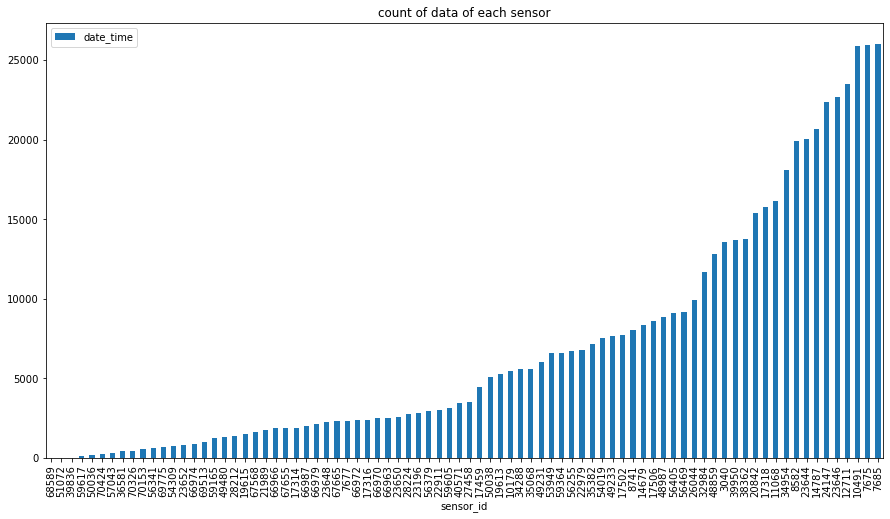

In [79]:
# frequency of data
# obs. recorded each day for each sensor
df.groupby(['sensor_id'])['date_time'].count().reset_index().sort_values('date_time').plot(x='sensor_id', y='date_time', kind='bar', figsize=(15,8), title='count of data of each sensor')

<AxesSubplot:title={'center':'% of pm2.5 null data of each sensor'}, xlabel='sensor_id'>

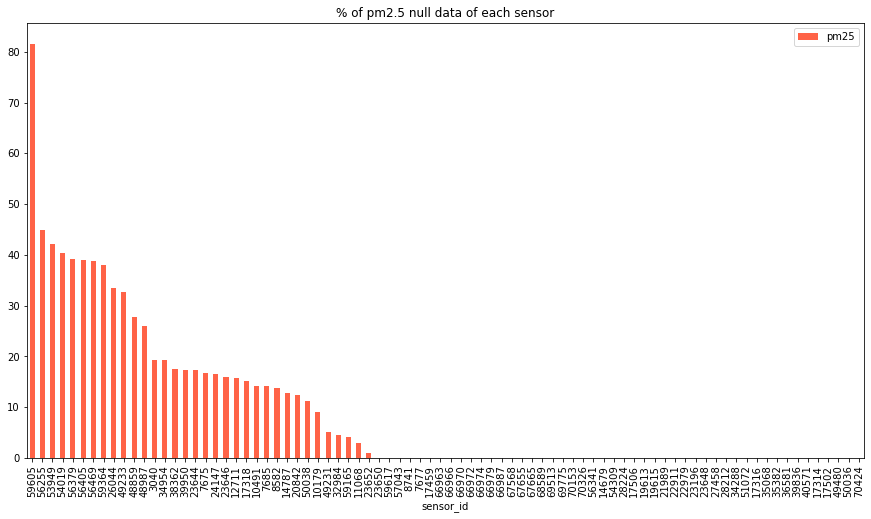

In [68]:
# % of null data per site
df.groupby('sensor_id')['pm25'].apply(lambda x: round(x.isnull().sum()/x.shape[0] * 100, 2)).sort_values(ascending=False).reset_index().plot(x='sensor_id', y='pm25', kind='bar', figsize=(15,8), title='% of pm2.5 null data of each sensor', color='tomato')

In [71]:
# extracting high null data sensors
pm25_null_df = df.groupby('sensor_id')['pm25'].apply(lambda x: round(x.isnull().sum()/x.shape[0] * 100, 2)).sort_values(ascending=False).reset_index()
pm25_null_df

,sensor_id,pm25
0,59605,81.56
1,56255,44.99
2,53949,42.22
3,54019,40.30
4,56379,39.22
...,...,...
77,17314,0.00
78,17502,0.00
79,49480,0.00
80,50036,0.00


In [95]:
print("sensors with null count > 0:\n", pm25_null_df[pm25_null_df['pm25'] > 0]['sensor_id'].unique(), "\ncount:",pm25_null_df[pm25_null_df['pm25'] > 0]['sensor_id'].unique().shape[0], sep="")
df[df['sensor_id'].isin(pm25_null_df[pm25_null_df['pm25'] > 0]['sensor_id'].unique().tolist())] 

sensors with null count > 0:
[59605 56255 53949 54019 56379 56405 56469 59364 26044 49233 48859 48987
  3040 34954 38362 39950 23644  7675 24147 23646 12711 17318 10491  7685
  8582 14787 20842 50038 10179 49231 32984 59165 11068 23652 23650]
count:35


,sensor_id,date_time,pm10,pm25,day_of_week,hour_of_day,latitude,longitude
1,12711,2019-01-01 01:00:00+00:00,9.084444,4.213333,2,1,51.498,-2.694
3,10179,2019-01-01 01:00:00+00:00,11.062083,4.469167,2,1,51.450,-2.612
4,11068,2019-01-01 01:00:00+00:00,9.252083,3.869167,2,1,51.502,-2.702
5,8582,2019-01-01 01:00:00+00:00,8.695238,3.618095,2,1,51.430,-2.612
6,10491,2019-01-01 01:00:00+00:00,12.433333,6.517917,2,1,51.464,-2.566
...,...,...,...,...,...,...,...,...
561821,59364,2022-02-28 01:00:00+00:00,25.620000,8.090000,1,1,51.448,-2.570
561822,48859,2022-02-28 01:00:00+00:00,22.900000,7.430000,1,1,51.436,-2.518
561823,24147,2022-02-28 01:00:00+00:00,25.080000,7.960000,1,1,51.450,-2.624
561824,56405,2022-02-28 01:00:00+00:00,7.130000,6.080000,1,1,51.444,-2.584


<AxesSubplot:title={'center':'pm25 plot for sensor 59605'}, xlabel='date_time'>

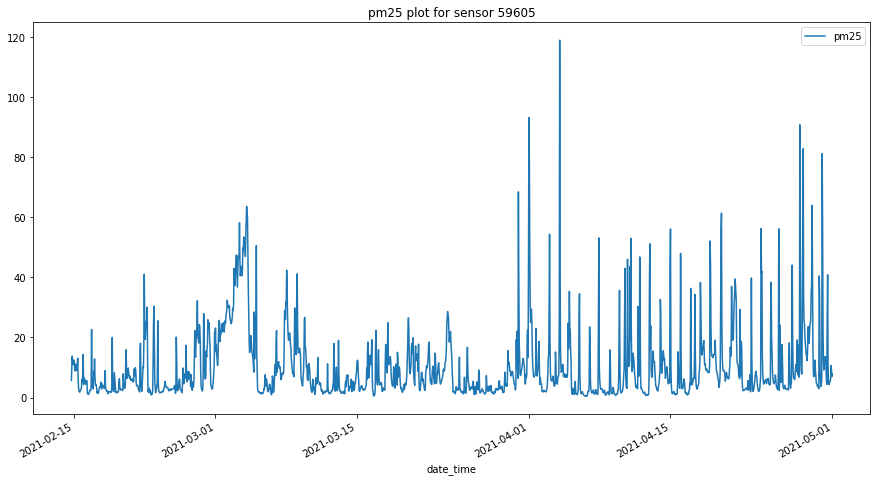

In [111]:
df[df['sensor_id'].isin([56379])].plot(x='date_time', y='pm25', figsize=(15,8), title='pm25 plot for sensor 59605')

Text(0.5, 1.0, 'PM2.5 data plot of sensors with null values')

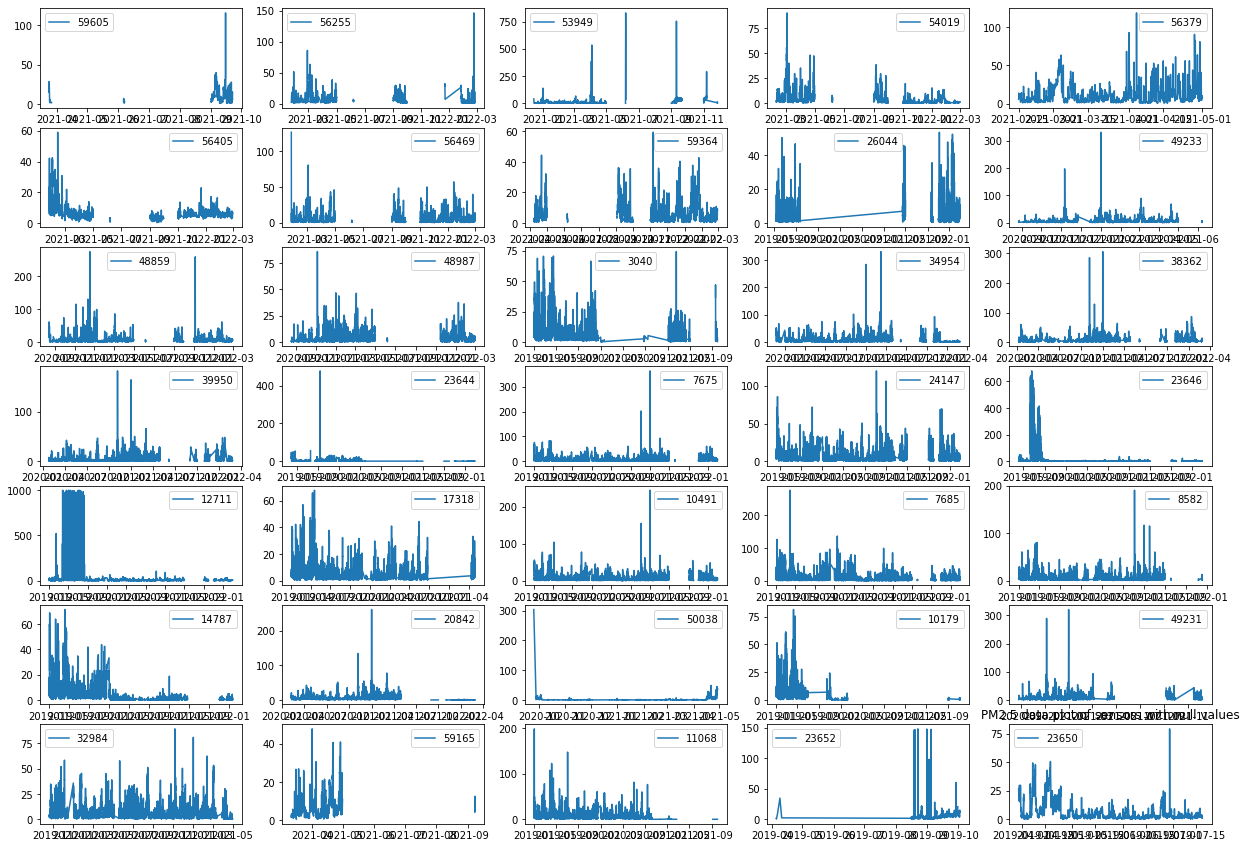

In [110]:
fig, ax = plt.subplots(figsize=(21, 15), nrows=7, ncols=5)
null_df = df[df['sensor_id'].isin(pm25_null_df[pm25_null_df['pm25'] > 0]['sensor_id'].unique().tolist())]
sensor_ids = pm25_null_df[pm25_null_df['pm25'] > 0]['sensor_id'].unique().tolist()
k = 0

for row in ax:
    for col in row:
        col.plot(null_df[null_df['sensor_id'] == sensor_ids[k]]['date_time'], null_df[null_df['sensor_id'] == sensor_ids[k]]['pm25'])
#         col.title('pm25 plot for sensor {}'.format(sensor_ids[k]))
        col.legend([sensor_ids[k]])
        k+=1

plt.title("PM2.5 data plot of sensors with null values")

/var/folders/cp/544pr8ln1f3cn9n_wy4r5nz80000gn/T/ipykernel_27247/2693779742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_df.fillna(null_df['pm25'].mean(), inplace=True)


Text(0.5, 1.0, 'PM2.5 data plot of sensors with null values')

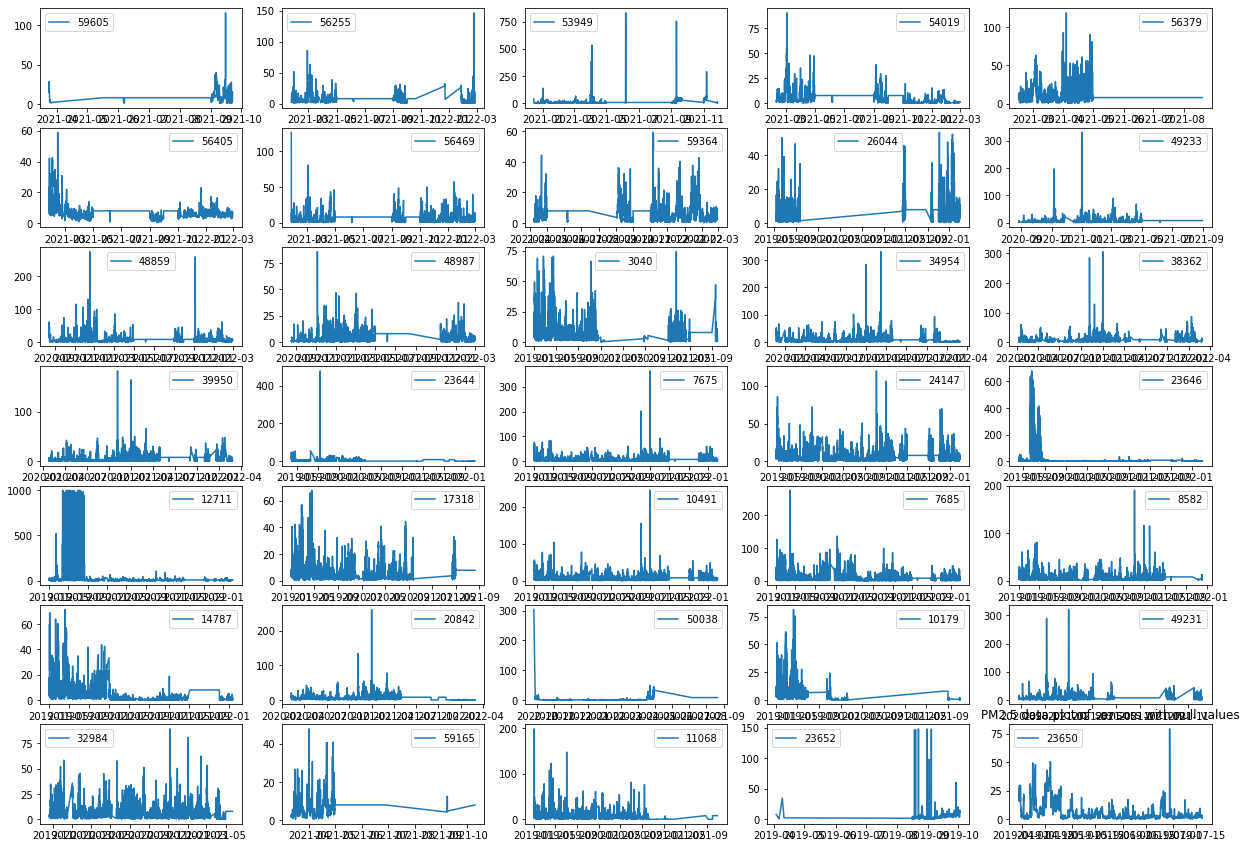

In [112]:
# finding effects of type of imputation
fig, ax = plt.subplots(figsize=(21, 15), nrows=7, ncols=5)
null_df = df[df['sensor_id'].isin(pm25_null_df[pm25_null_df['pm25'] > 0]['sensor_id'].unique().tolist())]

null_df.fillna(null_df['pm25'].mean(), inplace=True)

sensor_ids = pm25_null_df[pm25_null_df['pm25'] > 0]['sensor_id'].unique().tolist()
k = 0

for row in ax:
    for col in row:
        col.plot(null_df[null_df['sensor_id'] == sensor_ids[k]]['date_time'], null_df[null_df['sensor_id'] == sensor_ids[k]]['pm25'])
#         col.title('pm25 plot for sensor {}'.format(sensor_ids[k]))
        col.legend([sensor_ids[k]])
        k+=1

plt.title("PM2.5 data plot of sensors with null values")

Since less than 15% values are null, it would be better to just drop them

In [116]:
round(df['pm25'].isnull().sum() / df.shape[0] * 100, 2)

14.8

In [119]:
df = df.drop(df[df['pm25'].isnull()].index, axis=0).sort_values('date_time').reset_index(drop=True)

<AxesSubplot:title={'center':'count of data of each sensor'}, xlabel='sensor_id'>

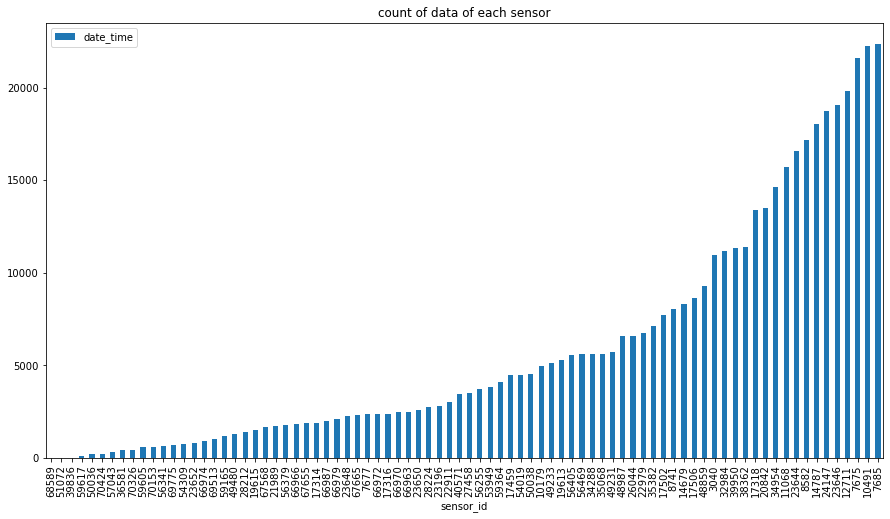

In [120]:
df.groupby(['sensor_id'])['date_time'].count().reset_index().sort_values('date_time').plot(x='sensor_id', y='date_time', kind='bar', figsize=(15,8), title='count of data of each sensor')

In [121]:
nan = Preprocessing.NanAnalyzer(df)
nan.printNaNInfo()


NAN INFO IN THE DATASET:

No of columns with only NaN values: 0
Column list with only NaN values:
[]

No of columns with partial NaN values: 0
Column list with partial NaN values:
[]

No of columns with no NaN values: 8
Column list with no NaN values:
['sensor_id', 'date_time', 'pm10', 'pm25', 'day_of_week', 'hour_of_day', 'latitude', 'longitude']

Total Values in dataset: 3829352

Total NaN Values in the dataset: 0

Total Partial NaN Values in the dataset: 0

Partial NaN Values Info:
Empty DataFrame
Columns: [Columns, Partial_NaN_Count, NaN_Vals_By_Total_Vals]
Index: []

Total NaN Values/Total Datset Values: 0.0 %


In [122]:
project_dir

'/Users/gurdeep/Documents/tb2/DSMP/G32-Butterfly-Data'

In [123]:
df.to_csv('/Users/gurdeep/Documents/tb2/DSMP/luftaden_data.csv', index=False)

In [126]:
Preprocessing.NanAnalyzer(pd.read_csv('/Users/gurdeep/Documents/tb2/DSMP/air_quality_no2_diffusion_data.csv', delimiter=';')).printNaNInfo()


NAN INFO IN THE DATASET:

No of columns with only NaN values: 0
Column list with only NaN values:
[]

No of columns with partial NaN values: 0
Column list with partial NaN values:
[]

No of columns with no NaN values: 8
Column list with no NaN values:
['Site ID', 'Location', 'Year', 'Concentration ugm-3', 'Count', 'Easting', 'Northing', 'geo_point_2d']

Total Values in dataset: 9952

Total NaN Values in the dataset: 0

Total Partial NaN Values in the dataset: 0

Partial NaN Values Info:
Empty DataFrame
Columns: [Columns, Partial_NaN_Count, NaN_Vals_By_Total_Vals]
Index: []

Total NaN Values/Total Datset Values: 0.0 %
